# 5.2 Exercises: Histograms, Boxplots, Bullet Charts, and one more
# Rahul Rajeev

In [1]:
# libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
# dataset
education = pd.read_csv('education.csv')
education = education.drop(index=0)
education.head()

,state,reading,math,writing,percent_graduates_sat,pupil_staff_ratio,dropout_rate
1,Alabama,557,552,549,7,6.7,2.3
2,Alaska,520,516,492,46,7.9,7.3
3,Arizona,516,521,497,26,10.4,7.6
4,Arkansas,572,572,556,5,6.8,4.6
5,California,500,513,498,49,10.9,5.5


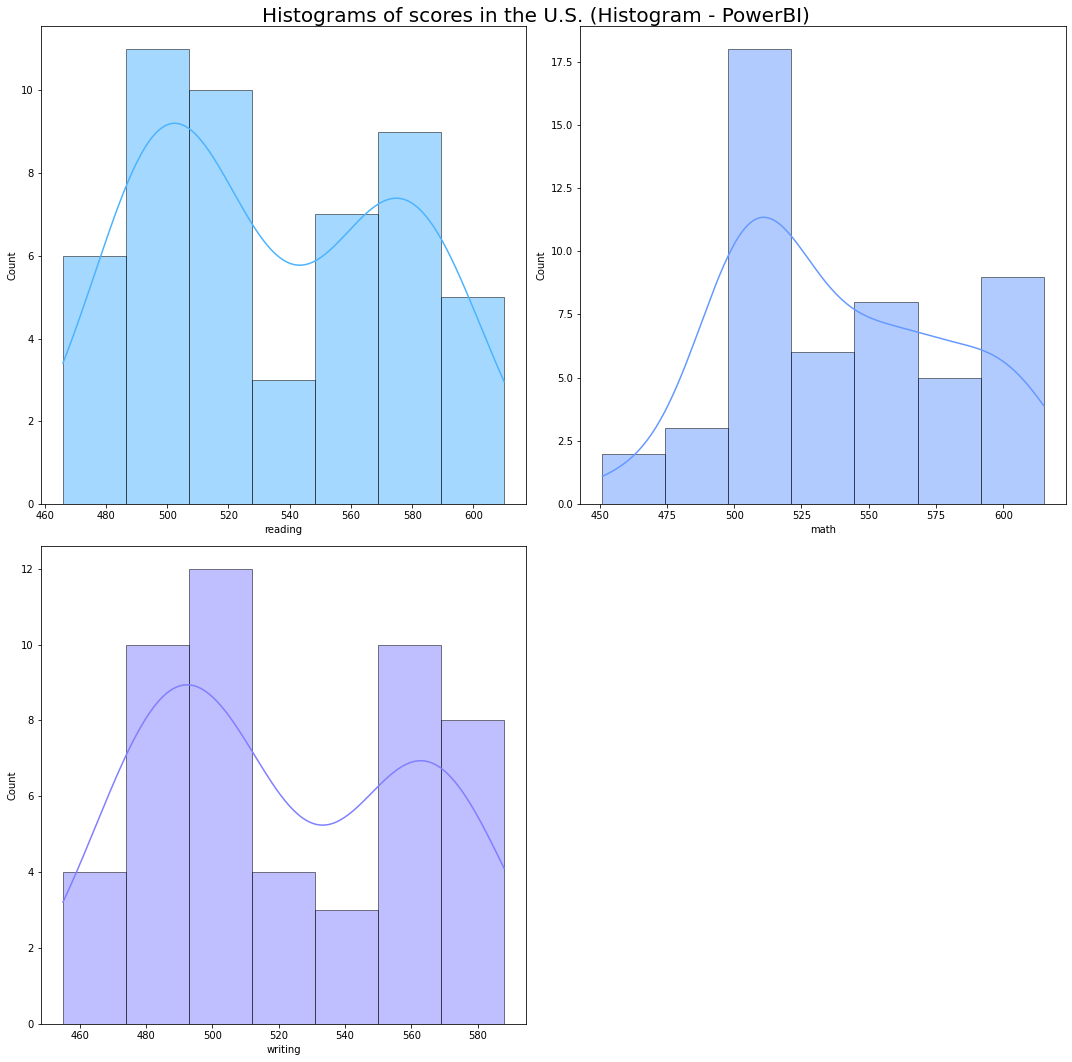

In [69]:
# histogram

fig, axs = plt.subplots(2, 2, figsize=(15, 15))

a = plt.cm.cool
colors = [a(0.3),a(0.4),a(0.5)]

sns.histplot(data=education, x="reading", kde=True, color = colors[0],
             edgecolor='black', linewidth=0.5, ax = axs[0,0])
sns.histplot(data=education, x="math", kde=True, color = colors[1],
             edgecolor='black', linewidth=0.5, ax = axs[0,1])
sns.histplot(data=education, x="writing", kde=True, color = colors[2],
             edgecolor='black', linewidth=0.5, ax = axs[1,0])
axs[1,1].set_axis_off()
plt.suptitle('Histograms of scores in the U.S. (Histogram - PowerBI)', fontsize=20)
plt.tight_layout()
plt.show()

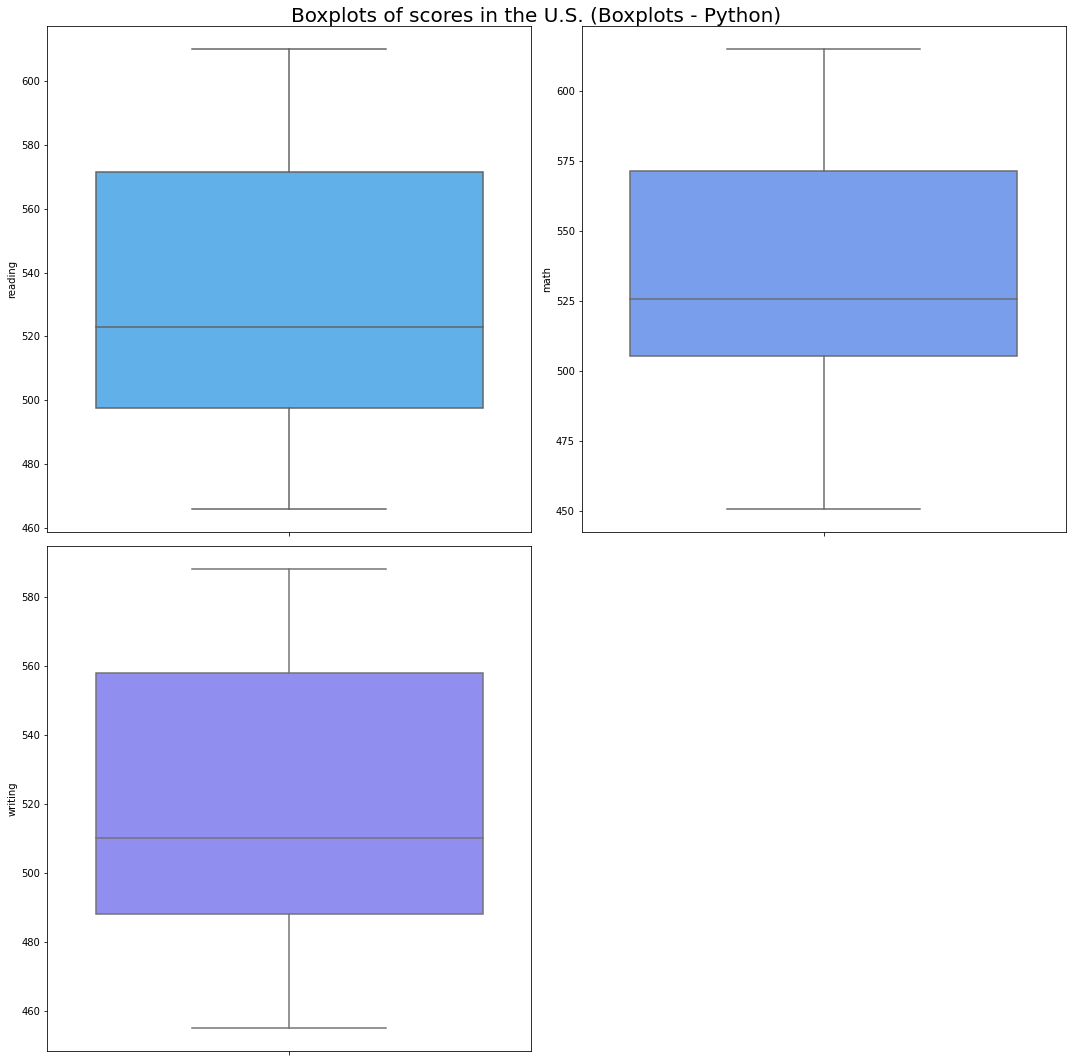

In [20]:
# box plots

fig, axs = plt.subplots(2, 2, figsize=(15, 15))

sns.boxplot(y='reading', data=education, ax = axs[0,0], color = colors[0])
sns.boxplot(y='math', data=education, ax = axs[0,1], color = colors[1])
sns.boxplot(y='writing', data=education, ax = axs[1,0], color = colors[2])
axs[1,1].set_axis_off()

plt.suptitle('Boxplots of scores in the U.S. (Boxplots - Python)', fontsize=20)
plt.tight_layout()
plt.show()

In [25]:
# bullet chart of california scores against 1st quartile, median, and third quartile as range values
education_full = pd.read_csv('education.csv')

In [32]:
scores = education_full[['reading', 'math', 'writing']].drop(index=0)
stats = scores.describe()
stats

,reading,math,writing
count,51.000000,51.000000,51.000000
mean,534.450980,538.823529,521.372549
std,40.753559,41.236249,39.437019
min,466.000000,451.000000,455.000000
25%,497.500000,505.500000,488.000000
50%,523.000000,526.000000,510.000000
75%,571.500000,571.500000,558.000000
max,610.000000,615.000000,588.000000


In [60]:
stats_t = stats.transpose()
stats_t

,count,mean,std,min,25%,50%,75%,max
reading,51.0,534.450980,40.753559,466.0,497.5,523.0,571.5,610.0
math,51.0,538.823529,41.236249,451.0,505.5,526.0,571.5,615.0
writing,51.0,521.372549,39.437019,455.0,488.0,510.0,558.0,588.0


In [61]:
stats_t.to_csv('stats.csv')

In [43]:
# california scores: 500 513 498
import plotly.figure_factory as ff
data = [
  {"label": "reading", 
   #"sublabel": "us$, in thousands",
   "range": [497, 523, 572], 
   #"performance": [220,270],
   "point": [500]},
    
  {"label": "math", 
   #"sublabel": "%", 
   "range": [505, 526, 572],
   #"performance": [21, 23], 
   "point": [513]},
    
  {"label": "writing", 
   #"sublabel":"US$, average",
   "range": [488, 510, 558],
   #"performance": [100,320],
   "point": [498]},
]


fig = ff.create_bullet(
    data, titles='label',
    # subtitles='sublabel', 
    markers='point',
    # measures='performance',
    ranges='range', 
    orientation='v',
    title='California Scores vs. the U.S. Quartiles (Bullet Chart - Python)',
    range_colors=['rgb(14, 52, 75)', 'rgb(31, 141, 127)'],
    scatter_options={'marker': {'symbol': 'circle', 'color': 'white'}}, width=700
)
  
fig.show()

In [52]:
# additional chart - spatial chart with dropout rates
spatial = education_full[['state', 'dropout_rate']].drop(index=0)
spatial.head()

,state,dropout_rate
1,Alabama,2.3
2,Alaska,7.3
3,Arizona,7.6
4,Arkansas,4.6
5,California,5.5


In [55]:
us_state_to_abbrev = {
    "Alabama": "AL",
    "Alaska": "AK",
    "Arizona": "AZ",
    "Arkansas": "AR",
    "California": "CA",
    "Colorado": "CO",
    "Connecticut": "CT",
    "Delaware": "DE",
    "Florida": "FL",
    "Georgia": "GA",
    "Hawaii": "HI",
    "Idaho": "ID",
    "Illinois": "IL",
    "Indiana": "IN",
    "Iowa": "IA",
    "Kansas": "KS",
    "Kentucky": "KY",
    "Louisiana": "LA",
    "Maine": "ME",
    "Maryland": "MD",
    "Massachusetts": "MA",
    "Michigan": "MI",
    "Minnesota": "MN",
    "Mississippi": "MS",
    "Missouri": "MO",
    "Montana": "MT",
    "Nebraska": "NE",
    "Nevada": "NV",
    "New Hampshire": "NH",
    "New Jersey": "NJ",
    "New Mexico": "NM",
    "New York": "NY",
    "North Carolina": "NC",
    "North Dakota": "ND",
    "Ohio": "OH",
    "Oklahoma": "OK",
    "Oregon": "OR",
    "Pennsylvania": "PA",
    "Rhode Island": "RI",
    "South Carolina": "SC",
    "South Dakota": "SD",
    "Tennessee": "TN",
    "Texas": "TX",
    "Utah": "UT",
    "Vermont": "VT",
    "Virginia": "VA",
    "Washington": "WA",
    "West Virginia": "WV",
    "Wisconsin": "WI",
    "Wyoming": "WY",
    "District of Columbia": "DC",
    "American Samoa": "AS",
    "Guam": "GU",
    "Northern Mariana Islands": "MP",
    "Puerto Rico": "PR",
    "United States Minor Outlying Islands": "UM",
    "U.S. Virgin Islands": "VI",
}
    
# invert the dictionary
spatial2 = spatial.replace({"state": us_state_to_abbrev})
spatial2.head()

,state,dropout_rate
1,AL,2.3
2,AK,7.3
3,AZ,7.6
4,AR,4.6
5,CA,5.5


In [57]:
spatial['state'] = spatial['state'].str.lower()

spatial_r = spatial.rename(columns={'state': "region", "dropout_rate" : "value"})

spatial_r.to_csv('spatial_r.csv')

In [56]:
import plotly.express as px
fig = px.choropleth(spatial2, locations='state',
                    locationmode="USA-states", color='dropout_rate', scope="usa", 
                   title="Choropleth Map for dropout rates in US (Spatial Chart - Python)")
 
fig.show()

In [67]:
reading = scores['reading'].value_counts().reset_index()
math = scores['math'].value_counts().reset_index()
writing = scores['writing'].value_counts().reset_index()

,index,writing
0,480,3
1,479,2
2,510,2
3,555,2
4,499,2
5,498,2
6,469,1
7,478,1
8,540,1
9,475,1
